<a href="https://colab.research.google.com/github/khaichi11/py-ch/blob/ai/Self_Practice_Konstruksi_dan_Dokumentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Langkah 1: Analisis, Telaah, dan Validasi Data

### Mengimport Library dan Memuat Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

pd.set_option('display.max_columns', None)
data_titanic = pd.read_csv('/content/drive/MyDrive/AITF/AITF Self-Practice Konstruksi dan Dokumentasi/Titanic-Dataset.csv')

### Pengecekan Dimensi dan Sampel Data

In [28]:
print("Dimensi dataset (baris, kolom):", data_titanic.shape)
print("Lima baris pertama dataset:")
print(data_titanic.head())

Dimensi dataset (baris, kolom): (891, 12)
Lima baris pertama dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C

### Identifikasi Tipe Data dan Missing Value

In [29]:
print("Informasi Tipe Data:")
print(data_titanic.info())

print("\nJumlah Nilai yang Hilang (Null):")
print(data_titanic.isnull().sum())

Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Jumlah Nilai yang Hilang (Null):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare         

## Langkah 2: Strategi Pembersihan Data


### Analisis Persentase Missing Value dan Penentuan Strategi

In [30]:
missing_percentage = data_titanic.isnull().mean() * 100
print("Persentase data hilang per kolom:")
print(missing_percentage[missing_percentage > 0])

Persentase data hilang per kolom:
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


## Langkah 3: Koreksi Data Kotor

###  Eksekusi Penghapusan dan Imputasi Data

In [32]:
# Melakukan penghapusan
if 'Cabin' in data_titanic.columns:
    data_titanic.drop(columns=['Cabin'])

# Melakukan imputasi
data_titanic['Age'].fillna(data_titanic['Age'].median())
data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0])

print("Cek ulang jumlah missing value setelah koreksi:")
print(data_titanic.isnull().sum().sum())

Cek ulang jumlah missing value setelah koreksi:
0


### Penanganan Outlier dengan Metode IQR

In [33]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numeric_cols:
    Q1 = data_titanic[col].quantile(0.25)
    Q3 = data_titanic[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_titanic[col] = data_titanic[col].clip(lower=lower_bound, upper=upper_bound)

print("Statistik deskriptif setelah penanganan outlier:")
print(data_titanic[numeric_cols].describe())

Statistik deskriptif setelah penanganan outlier:
              Age        Fare       SibSp  Parch
count  891.000000  891.000000  891.000000  891.0
mean    29.039282   24.046813    0.426487    0.0
std     12.072074   20.481625    0.708246    0.0
min      2.500000    0.000000    0.000000    0.0
25%     22.000000    7.910400    0.000000    0.0
50%     28.000000   14.454200    0.000000    0.0
75%     35.000000   31.000000    1.000000    0.0
max     54.500000   65.634400    2.500000    0.0


## Langkah 4: Melakukan Transformasi Data

###  Encoding dan Normalisasi Data

In [34]:
# Encoding kolom Sex
data_titanic['Sex_Encoded'] = data_titanic['Sex'].map({'male': 0, 'female': 1})

# Normalisasi MinMax
scaler = MinMaxScaler()
cols_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']
data_titanic[cols_to_scale] = scaler.fit_transform(data_titanic[cols_to_scale])

print("Contoh data setelah normalisasi:")
print(data_titanic[cols_to_scale].head())

Contoh data setelah normalisasi:
        Age      Fare  SibSp  Parch
0  0.375000  0.110460    0.4    0.0
1  0.682692  1.000000    0.4    0.0
2  0.451923  0.120745    0.0    0.0
3  0.625000  0.809027    0.4    0.0
4  0.625000  0.122649    0.0    0.0


### Seleksi dan Rekayasa Fitur

In [35]:
# Seleksi Fitur
X = data_titanic[['Age', 'Fare', 'SibSp', 'Parch', 'Sex_Encoded']]
y = data_titanic['Survived']
selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# Binning Usia
data_titanic['Age_Binned'] = pd.cut(data_titanic['Age'], bins=3, labels=['Muda', 'Dewasa', 'Tua'])

print("Fitur terpilih:", selected_features.tolist())
print("Sampel hasil binning usia:")
print(data_titanic[['Age', 'Age_Binned']].head())

Fitur terpilih: ['Fare', 'Sex_Encoded']
Sampel hasil binning usia:
        Age Age_Binned
0  0.375000     Dewasa
1  0.682692        Tua
2  0.451923     Dewasa
3  0.625000     Dewasa
4  0.625000     Dewasa


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Langkah 5: Membuat Dokumentasi Konstruksi Data

## Pengecekan Statistik Akhir Sebelum melangkah ke pelabelan

In [36]:
print("Ringkasan Statistik Data Final:")
print(data_titanic.describe())

Ringkasan Statistik Data Final:
       PassengerId    Survived      Pclass         Age       SibSp  Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.0   
mean    446.000000    0.383838    2.308642    0.510371    0.170595    0.0   
std     257.353842    0.486592    0.836071    0.232155    0.283298    0.0   
min       1.000000    0.000000    1.000000    0.000000    0.000000    0.0   
25%     223.500000    0.000000    2.000000    0.375000    0.000000    0.0   
50%     446.000000    0.000000    3.000000    0.490385    0.000000    0.0   
75%     668.500000    1.000000    3.000000    0.625000    0.400000    0.0   
max     891.000000    1.000000    3.000000    1.000000    1.000000    0.0   

             Fare  Sex_Encoded  
count  891.000000   891.000000  
mean     0.366375     0.352413  
std      0.312056     0.477990  
min      0.000000     0.000000  
25%      0.120522     0.000000  
50%      0.220223     0.000000  
75%      0.472313     1.000000  
max      1

## Langkah 6: Melakukan Pelabelan Data

###  Pelabelan Semantik pada Target

In [37]:
label_mapping = {0: 'Tidak Selamat', 1: 'Selamat'}
data_titanic['Survived_Label'] = data_titanic['Survived'].map(label_mapping)

print("Sampel data hasil pelabelan:")
print(data_titanic[['Survived', 'Survived_Label']].head())

Sampel data hasil pelabelan:
   Survived Survived_Label
0         0  Tidak Selamat
1         1        Selamat
2         1        Selamat
3         1        Selamat
4         0  Tidak Selamat


## Langkah 7: Membuat Laporan Hasil Pelabelan Data

### Analisis Distribusi dan Proporsi Kelas

In [38]:
print("Distribusi jumlah penumpang per kategori:")
print(data_titanic['Survived_Label'].value_counts())

print("\nProporsi persentase target (%):")
print(data_titanic['Survived_Label'].value_counts(normalize=True) * 100)

Distribusi jumlah penumpang per kategori:
Survived_Label
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64

Proporsi persentase target (%):
Survived_Label
Tidak Selamat    61.616162
Selamat          38.383838
Name: proportion, dtype: float64


## Langkah 8: Visualisasi Data

###Visualisasi Histogram Ternormalisasi

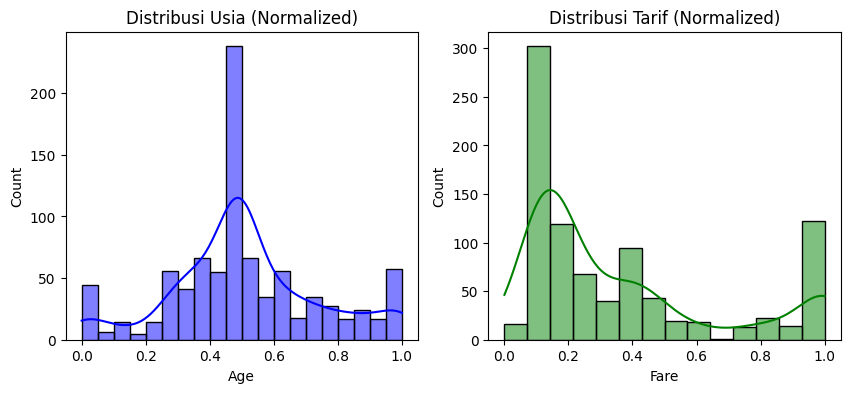

In [40]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data_titanic['Age'], kde=True, color='blue')
plt.title('Distribusi Usia (Normalized)')

plt.subplot(1, 2, 2)
sns.histplot(data_titanic['Fare'], kde=True, color='green')
plt.title('Distribusi Tarif (Normalized)')
plt.show()


### Visualisasi Scatter Plot Hubungan Fitur

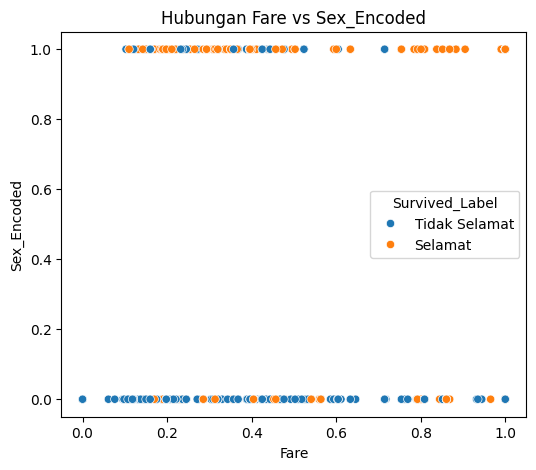

In [41]:
feat1, feat2 = selected_features[0], selected_features[1]
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data_titanic, x=feat1, y=feat2, hue='Survived_Label')
plt.title(f'Hubungan {feat1} vs {feat2}')
plt.show()

### Visualisasi Box Plot untuk Fitur Numerik Ternormalisasi

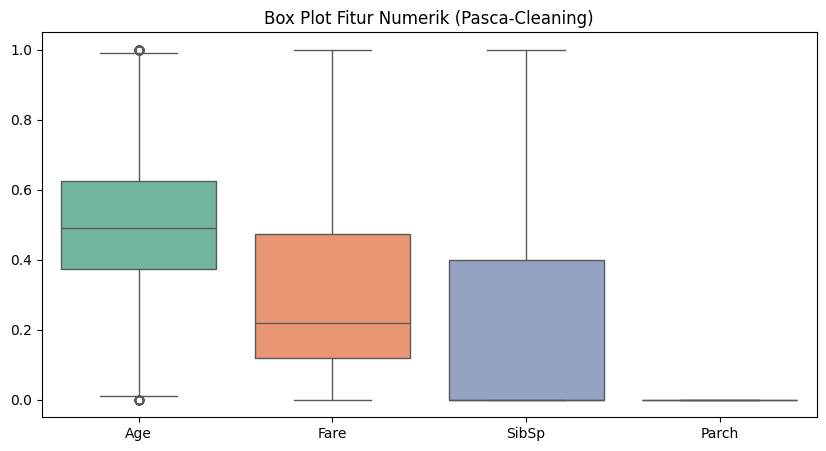

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_titanic[['Age', 'Fare', 'SibSp', 'Parch']], palette='Set2')
plt.title('Box Plot Fitur Numerik (Pasca-Cleaning)')
plt.show()

### Visualisasi Count Plot untuk Kategori Usia (Hasil Binning)

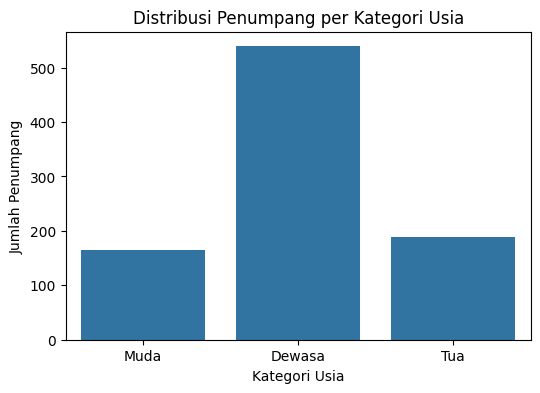

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data_titanic, x='Age_Binned')
plt.title('Distribusi Penumpang per Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()

## Langkah 9: Evaluasi dan Dokumentasi


### Evaluasi Kualitas Data dan Kesimpulan

In [22]:
print("Evaluasi Akhir Dataset:")
print(data_titanic.info())
print("\nStatistik Deskriptif Final:")
print(data_titanic.describe())

Evaluasi Akhir Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    object  
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    float64 
 7   Parch           891 non-null    float64 
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Embarked        891 non-null    object  
 11  Sex_Encoded     891 non-null    int64   
 12  Age_Binned      891 non-null    category
 13  Survived_Label  891 non-null    object  
dtypes: category(1), float64(4), int64(4), object(5)
memory usage: 91.6+ KB
None

Statistik Deskriptif Final:
       PassengerId    Sur